# Linear and Logistic Regression in TensorFlow

## Dataset
[Fire and Theft in Chicago](http://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/slr/frames/slr05.html)

## Reference

[CS 20SI: TensorFlow for Deep Learning Research](http://web.stanford.edu/class/cs20si/lectures/notes_03.pdf)

## Notice
In the so called "stochastic" gradient descent applied in this notebook, the data is not shuffled in each iteration. So it is not stochastic gradient descent technically.


### Import corresponding libraries

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import xlrd
%matplotlib inline

### Read dataset

In [2]:
FILE_NAME=r".\data\slr05.xls"
book=xlrd.open_workbook(filename=FILE_NAME,encoding_override="UTF-8")
sheet=book.sheet_by_index(0)
data=np.asarray([sheet.row_values(i) for i in range(1,sheet.nrows)])

### Create graph

In [3]:
with tf.name_scope("FNT"):
    with tf.name_scope("Input"):
        X=tf.placeholder(dtype=tf.float32,name="X")
        Y=tf.placeholder(dtype=tf.float32,name="Y")
    w=tf.Variable(0.0,name="w")
    b=tf.Variable(0.0,name="b")
    Y_pred=w*X+b
    with tf.name_scope("Loss"):
        loss=tf.square(Y-Y_pred,name="loss")
    with tf.name_scope("Train"):
        optimizer=tf.train.GradientDescentOptimizer(learning_rate=0.00001).minimize(loss)
    with tf.name_scope(name="MNIST_Summary") as scope:
        tf.summary.scalar("Loss_Summary",loss)
        summary_op=tf.summary.merge(tf.get_collection(tf.GraphKeys.SUMMARIES,scope))

### Train $w$, $b$ with stochastic gradient descent in a session

In [4]:
with tf.Session() as sess:
    writer=tf.summary.FileWriter(r"./graphs",sess.graph)
    sess.run(tf.global_variables_initializer())
    for i in range(500):#Number of iterations
        for x,y in data:
            _,summary=sess.run([optimizer,summary_op],feed_dict={X:x,Y:y})
            writer.add_summary(summary,global_step=i)
    w_val,b_val=sess.run([w,b])
writer.close()
print("w:",w_val,"b:",b_val)

w: 2.03623 b: 2.48112


### Plot and evaluate fitting

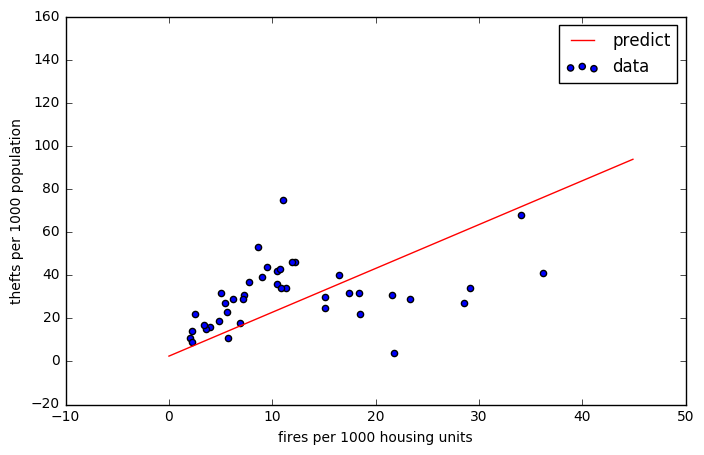

In [5]:
plt.figure(figsize=(8,5))
plt.scatter(x=data.T[0],y=data.T[1],label="data")
x_plot=np.arange(0,45,0.1)
y_plot=w_val*x_plot+b_val
plt.plot(x_plot,y_plot,label="predict",color="red")
plt.xlabel("fires per 1000 housing units")
plt.ylabel("thefts per 1000 population")
plt.legend()
plt.show()

### Train $w$, $b$ with batch gradient descent in another session

In [6]:
#Need to use new learning rate for batch gradient descent.
optimizer=tf.train.GradientDescentOptimizer(learning_rate=0.00001).minimize(loss)#Use new optimizer (with smaller learning rate).
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(1000):#Number of iterations
        sess.run(optimizer,feed_dict={X:data.T[0],Y:data.T[1]})
    w_val,b_val=sess.run([w,b])
print("w:",w_val,"b:",b_val)

w: 1.9417 b: 4.52292


### Plot and evaluate fitting

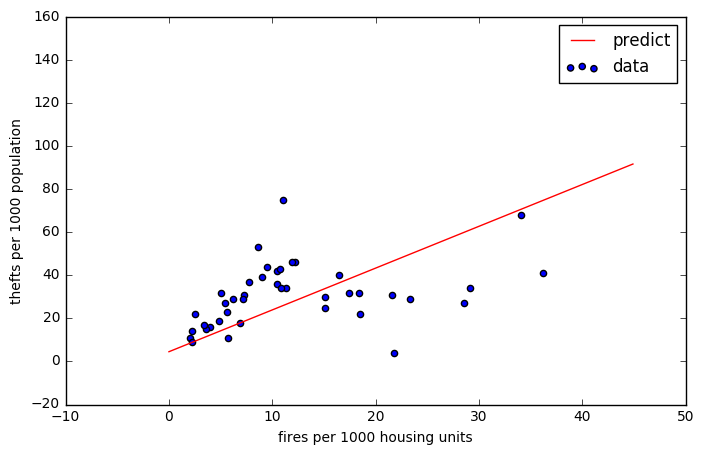

In [7]:
plt.figure(figsize=(8,5))
plt.scatter(x=data.T[0],y=data.T[1],label="data")
x_plot=np.arange(0,45,0.1)
y_plot=w_val*x_plot+b_val
plt.plot(x_plot,y_plot,label="predict",color="red")
plt.xlabel("fires per 1000 housing units")
plt.ylabel("thefts per 1000 population")
plt.legend()
plt.show()

### Create new graph for regression.

In [8]:
with tf.name_scope("FNT"):
    with tf.name_scope("Input"):
        X=tf.placeholder(dtype=tf.float32,name="X")
        Y=tf.placeholder(dtype=tf.float32,name="Y")
    w3=tf.Variable(0.0,name="w3")
    w2=tf.Variable(0.0,name="w2")
    w1=tf.Variable(0.0,name="w1")
    w0=tf.Variable(0.0,name="w0")
    Y_pred=w3*X*X*X+w2*X*X+w1*X+w0
    with tf.name_scope("Loss"):
        loss=tf.square(Y-Y_pred)
    with tf.name_scope("Train"):
        optimizer=tf.train.AdamOptimizer(learning_rate=0.001).minimize(loss)

### Train $w_{3}$, $w_{2}$, $w_{1}$, $w_{0}$ with stochastic gradient descent in a session.

In [9]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(750):#Number of iterations
        for x,y in data:
            sess.run(optimizer,feed_dict={X:x,Y:y})
    param=sess.run([w3,w2,w1,w0])
for i in range(4):
    print("w{}: {}".format(3-i,param[i]))

w3: 0.00663035549223423
w2: -0.1510164737701416
w1: 1.8178060054779053
w0: 10.240422248840332


### Plot and evaluate fitting.

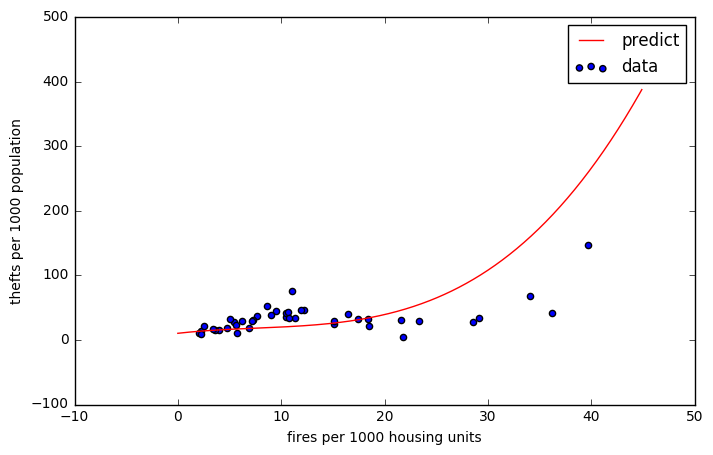

In [10]:
plt.figure(figsize=(8,5))
plt.scatter(x=data.T[0],y=data.T[1],label="data")
x_plot=np.arange(0,45,0.1)
y_plot=param[0]*(x_plot**3)+param[1]*x_plot**2+param[2]*x_plot+param[3]
plt.plot(x_plot,y_plot,label="predict",color="red")
plt.xlabel("fires per 1000 housing units")
plt.ylabel("thefts per 1000 population")
plt.legend()
plt.show()

### Import MNIST dataset.

In [11]:
from tensorflow.examples.tutorials.mnist import input_data
MNIST=input_data.read_data_sets(r"/data/mnist",one_hot=True)

Extracting /data/mnist\train-images-idx3-ubyte.gz
Extracting /data/mnist\train-labels-idx1-ubyte.gz
Extracting /data/mnist\t10k-images-idx3-ubyte.gz
Extracting /data/mnist\t10k-labels-idx1-ubyte.gz


### Create graph.

In [12]:
learning_rate=0.01
batch_size=128
n_epochs=25
with tf.name_scope(name="MNIST"):
    with tf.name_scope(name="MNIST_Input"):
        X=tf.placeholder(dtype=tf.float32,name="X_MNIST",shape=[batch_size,784])
    with tf.name_scope(name="MNIST_Ouput_Train"):
        Y=tf.placeholder(dtype=tf.float32,name="Y_MNIST",shape=[batch_size,10])
    W=tf.Variable(tf.random_normal(shape=[784,10],stddev=0.01),name="weight")
    
    #b=tf.Variable(0.0,name="bias")#
    #I don't think applying the same value of bias over all 10 dimensions in output layer will make a difference, 
    #for the reason that if an output of a dimension in the output vector is the max over all 10 dimensions,
    #the ranking would not change if we apply the same bias to all 10 dimensions, thus it makes no difference in 
    #prediction.
    b=tf.Variable(tf.truncated_normal(dtype=tf.float32,shape=[10]),name="bias")
    #Tried to apply different biases to different dimensions, but it turns out 
    #that the model works well without bias in the output layer.
    
    #Verified by outln=tf.matmul(X,W)
    with tf.name_scope(name="MNIST_Ouput"):
        outln=tf.matmul(X,W)+b
        #outln=tf.matmul(X,W)#A verification of a hypothesis above.
    entropy=tf.nn.softmax_cross_entropy_with_logits(logits=outln,labels=Y)
    loss=tf.reduce_mean(entropy)
    optimizer=tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(loss)
    with tf.name_scope(name="MNIST_Summary") as scope:
        tf.summary.scalar("MNIST_Loss",loss)
        summary_op=tf.summary.merge(tf.get_collection(tf.GraphKeys.SUMMARIES,scope))

### Training.

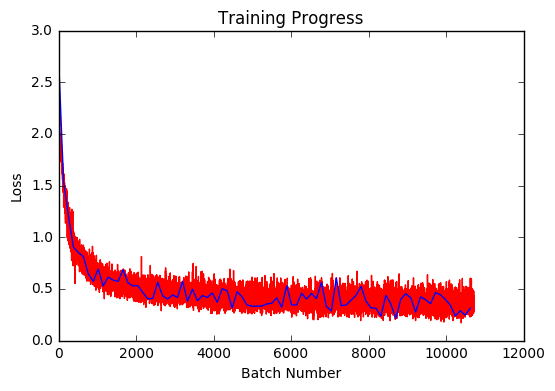

In [13]:
pltLossY=[]
writer=tf.summary.FileWriter(r"./graphs",sess.graph)
with tf.Session() as sess:
    #Training
    sess.run(tf.global_variables_initializer())
    n_batches=int(MNIST.train.num_examples/batch_size)
    for i in range(n_epochs):
        for j in range(n_batches):
            X_batch,Y_batch=MNIST.train.next_batch(batch_size=batch_size)
            _,loss_val,summary=sess.run([optimizer,loss,summary_op],feed_dict={X:X_batch,Y:Y_batch})
            pltLossY.append(loss_val)
        writer.add_summary(summary=summary,global_step=i)
    #Save model
    saver=tf.train.Saver()
    saver.save(sess,r"./model_checkpoints/MNIST_LR",n_epochs)
#Save results
writer.close()
#Plotting
pltLossY=np.array(pltLossY)
pltLossX=np.arange(1,np.shape(pltLossY)[0]+1,1)
plt.plot(pltLossX,pltLossY,label="loss",color="red")
pltLossX=np.array([enum[1] for enum in enumerate(pltLossX) if enum[0]%batch_size==0])
pltLossY=np.array([enum[1] for enum in enumerate(pltLossY) if enum[0]%batch_size==0])
plt.plot(pltLossX,pltLossY,label="loss",color="blue")
plt.xlabel("Batch Number")
plt.ylabel("Loss")
plt.title("Training Progress")
#plt.legend()
plt.show()

### Testing

In [14]:
with tf.Session() as sess:
    n_batches=int(MNIST.test.num_examples/batch_size)
    total_correct_preds = 0
    #Load the model(load the trianed variables)
    tf.train.Saver().restore(sess,"./model_checkpoints/MNIST_LR"+"-"+str(n_epochs))
    for i in range (n_batches):
        X_batch,Y_batch=MNIST.test.next_batch(batch_size)
        preds=sess.run(outln,feed_dict={X:X_batch,Y:Y_batch})
        #preds=tf.nn.softmax(preds)
        #No need for softmax to make predictions, actually. Spare computation. 
        correct_preds=tf.equal(tf.argmax(preds,1),tf.argmax(Y_batch,1))
        batch_correct_preds=tf.reduce_sum(tf.cast(correct_preds,tf.float32))
        total_correct_preds+=sess.run(batch_correct_preds)
#Print accuracy
print("Accuracy {0}".format(total_correct_preds/MNIST.test.num_examples))

Accuracy 0.9073
